In [29]:
from torchviz import make_dot
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [30]:
!pip install graphviz

- torchviz 라이브러리는 PyTorch 모델의 실행 그래프와 연산 과정을 시각화하는데 사용되는 라이브러리
- 내부적으로 Graphviz를 활용하여 모델의 연산 그래프를 이해하기 쉽게 그림으로 표현한다.
- make_dot 함수:
    - PyTorch 모델의 실행 그래프를 생성한다.
    - 이 함수는 모델의 출력값과 파라미터를 입력으로 받아 그래프를 생성하며, 이를 이미지 파일로 저장할 수도 있다.

- torch.nn 모듈
    - PyTorch 에서 신경망 모델을 구축하기 위한 다양한 클래스와 함수를 제공하는 핵심 모듈이다.
    - 이 모듈은 딥러닝 모델의 레이어, 손실 함수, 활성화 함수 등을 정의하고 관리하는데 사용된다.
    - nn.Module -> 모든 신경망 모델의 기본 클래스, 사용자 정의 모델을 만들 때 상속받아 사용하며, 레이어 정의와 순전파(forward) 과정을 구현한다.
    - nn.Linear: 선형 변환(fully connected layer)을 수행하는 클래스
    - nn.Identity: 입력값을 그대로 출력하는 레이어, 특정 연산을 생략하거나 모듈 대체 시 사용

In [31]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = torch.tensor([4.0, 5.0, 6.0], requires_grad=True)

# 덧셈
z = x + y
print(z)

tensor([5., 7., 9.], grad_fn=<AddBackward0>)


In [32]:
z.grad_fn

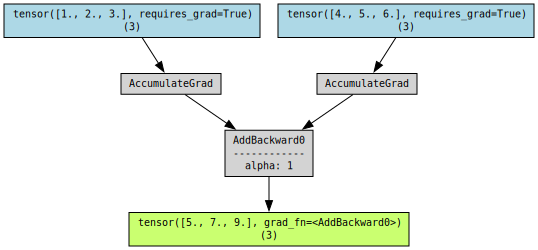

In [33]:
make_dot(z, params={x: x, y: y, z:z}, show_attrs=True, show_saved=True)

In [34]:
s = z.sum()

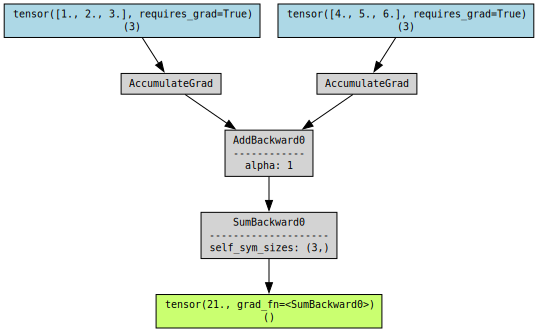

In [35]:
make_dot(s, params={x: x, y: y, z: z, s: s}, show_attrs=True, show_saved=True)

In [36]:
s.backward()

# 예시1: 텐서 생성

In [37]:
# 0으로 채워진 텐서
x = torch.zeros(2, 3)
print(x)

# 1로 채워진 텐서
y = torch.ones(2, 3)
print(y)

# 특정 값을 기준으로 텐서 생성
z = torch.tensor([[1, 2], [3, 4]])
print(z)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1, 2],
        [3, 4]])


# 예시 2: 텐서 타입 및 크기확인

In [38]:
x = torch.rand(2, 3, 4)
print(x.dtype)  # 기본 데이터 타입 -> torch.float32
print(x.size())

torch.float32
torch.Size([2, 3, 4])


# 예시 3: 텐서 변환 (reshape)

In [39]:
x = torch.rand(4, 4)
y = x.view(16)
z = x.view(-1, 8)   # -1 은 차원을 추론하여 자동 계산한다는 의미

print(y.size())
print(z.size())

torch.Size([16])
torch.Size([2, 8])


# 예시 4: 텐서 연결(concatenation)

In [40]:
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6]])
c = torch.cat([a, b], dim=0) # dim=0 은 행을 기준으로 병합
print(c)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


# 예시 5: 차원 추가 및 제거

In [41]:
x = torch.tensor([1, 2, 3, 4])
x1 = x.unsqueeze(0) # 차원 추가
x2 = x1.squeeze(0)  # 차원 제거
print(x1)
print(x1.size())
print(x2)
print(x2.size())

tensor([[1, 2, 3, 4]])
torch.Size([1, 4])
tensor([1, 2, 3, 4])
torch.Size([4])


# 예시 6: 텐서 인덱싱 및 슬라이싱

In [42]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)            # 텐서 원본
print(x[0, :])      # 첫 번째, 행 전체
print(x[:, :1])     # 두 번째, 열 전체
print(x[1:, 1:])    # 첫 번째 행 이후의 각 행의, 첫 번째 열 이후의 각 열

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([1, 2, 3])
tensor([[1],
        [4],
        [7]])
tensor([[5, 6],
        [8, 9]])


# 예시 7: 텐서 분리(splitting)

In [43]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
a, b = torch.split(x, 2, dim=0) # 행기준으로 2개씩 1이면 열기준
print(x)
print(a)
print(b)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[ 7,  8,  9],
        [10, 11, 12]])


# 예시 8: 텐서 전치(transpose)

In [44]:
x = torch.tensor([[1, 2], [3, 4], [5, 6]])
print(x.transpose(0, 1)) # 0번째와 1번째 차원을 전치

tensor([[1, 3, 5],
        [2, 4, 6]])


# PyTorch nn.Module

- nn.Module 은 PyTorch 의 신경망 구성을 위한 레이어 혹은 모델을 위한 클래스

# 실습: XOR 예측 문제
XOR 게이트 입력 매개변수 A, B를 주었을 때 출력 Y 를 계산하는 모델을 학습 및 구성.

In [45]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.layer1 = nn.Linear(2, 2)   # 입력이 두개, 출력이 두개
        self.layer2 = nn.Linear(2, 1)   # 입력이 두개, 출력이 하나
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x


In [46]:
# 데이터 정제
x_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_data = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)
model = XORModel()

# 모델 초기화
criterion = nn.BCELoss() # Binary Cross-Entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [51]:
losses = []
for epoch in range(100001):
    outputs = model(x_data)
    loss = criterion(outputs, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch % 1000 == 0:
        print(f'Epoch [{epoch}/10000], Loss: {loss.item(): .4f}')

Epoch [0/10000], Loss:  0.3872
Epoch [1000/10000], Loss:  0.1220
Epoch [2000/10000], Loss:  0.0621
Epoch [3000/10000], Loss:  0.0402
Epoch [4000/10000], Loss:  0.0294
Epoch [5000/10000], Loss:  0.0230
Epoch [6000/10000], Loss:  0.0188
Epoch [7000/10000], Loss:  0.0159
Epoch [8000/10000], Loss:  0.0137
Epoch [9000/10000], Loss:  0.0121
Epoch [10000/10000], Loss:  0.0108
Epoch [11000/10000], Loss:  0.0097
Epoch [12000/10000], Loss:  0.0088
Epoch [13000/10000], Loss:  0.0081
Epoch [14000/10000], Loss:  0.0075
Epoch [15000/10000], Loss:  0.0070
Epoch [16000/10000], Loss:  0.0065
Epoch [17000/10000], Loss:  0.0061
Epoch [18000/10000], Loss:  0.0057
Epoch [19000/10000], Loss:  0.0054
Epoch [20000/10000], Loss:  0.0051
Epoch [21000/10000], Loss:  0.0049
Epoch [22000/10000], Loss:  0.0046
Epoch [23000/10000], Loss:  0.0044
Epoch [24000/10000], Loss:  0.0042
Epoch [25000/10000], Loss:  0.0040
Epoch [26000/10000], Loss:  0.0039
Epoch [27000/10000], Loss:  0.0037
Epoch [28000/10000], Loss:  0.003

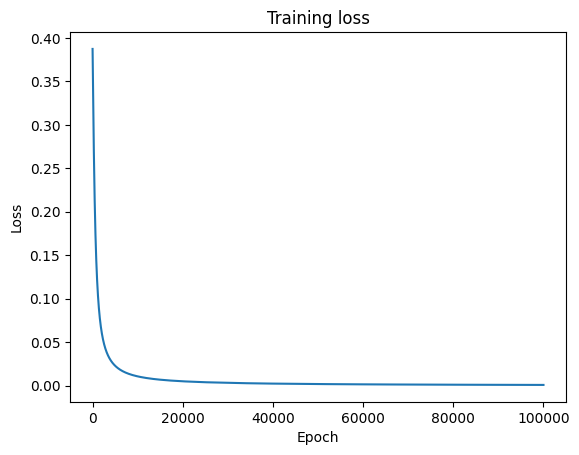

In [52]:
# Loss 시각화
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss')
plt.show()

In [53]:
with torch.no_grad():
    test = torch.tensor(
        [[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32
    )
    predicted = model(test)
    print(predicted)

tensor([[8.3116e-04],
        [9.9895e-01],
        [9.9895e-01],
        [8.8437e-04]])


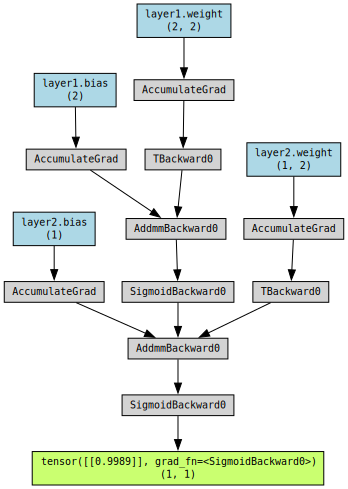

In [54]:
x = torch.randn(1, 2)
y = model(x)
make_dot(y, params={**dict(model.named_parameters()), y: y})